In [1]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
import random

### 1. 
Let X has gamma distribution.
\begin{align}
X \sim \Gamma(\alpha, \beta) \\
f(x) = \frac{1}{(\alpha - 1)! \beta^{\alpha}} x^{\alpha - 1} e^{-x / \beta}
\end{align}
Plot CDF of gamma distribution with (alpha = 1, beta = 2), (3, 2), (5, 1).

In [2]:
def CDFgamma(alpha, beta):
    x = np.linspace(0, 12, 1001)
    dx = 12 / 1000
    numer = x**(alpha-1) * np.exp(-x/beta)
    denom = math.factorial(alpha - 1) * beta**alpha
    pdf = numer / denom
    
    temp = 0
    cdf = []
    for i in pdf:
        temp += i * dx
        cdf.append(temp)
    
    return cdf

In [3]:
def CDFgamma2(alpha, beta):
    cdf = scipy.stats.gamma.cdf(np.linspace(0, 12, 1001), a=alpha, scale=beta)
    return cdf

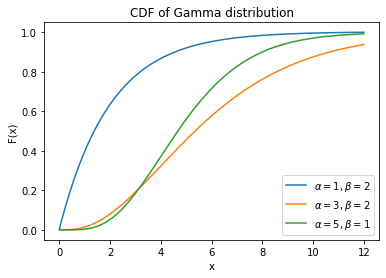

In [4]:
plt.plot(np.linspace(0, 12, 1001), CDFgamma(1, 2), label=r'$\alpha=1, \beta=2$')
plt.plot(np.linspace(0, 12, 1001), CDFgamma(3, 2), label=r'$\alpha=3, \beta=2$')
plt.plot(np.linspace(0, 12, 1001), CDFgamma(5, 1), label=r'$\alpha=5, \beta=1$')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
_ = plt.title('CDF of Gamma distribution')

### 2.
Let 
\begin{align}
f(x) = \frac{15}{16}(1-x^2)^2\ with\ support\ |x| \leq 1.
\end{align}
Random variable with this pdf has mean 0. Find this RV's varaince using Riemann sum.

In [5]:
x = np.linspace(-1, 1, 1001)
dx = 2 / 1000
pdf = 15/16 * (1-x**2)**2
(x**2 * pdf * dx).sum()

0.14285714285414286

### 3. 
Let X has exponential distribution.
\begin{align}
f(x) = \lambda e^{-\lambda x},\ for\ x \geq 0,\ and\ f(x) = 0\ for\ x < 0 \\
F(x) = 1-e^{-\lambda x},\ for\ x \geq 0,\ and\ F(x) = 0\ for\ x < 0
\end{align}

Inverse function of CDF of exponential distribution can be expressed as a single equation, since CDF of exponential distribution is bijection from [0, inf) to [0, 1]. Plot histogram with 1000 random numbers which follows exponential distribution with lambda = 1.5. using inverse function's equation of CDF. Find mean of these random numbers and compare the theoretical mean.

In [6]:
def inverse_cdf(q):
    x = np.linspace(0, 100, 100001)
    for i in x:
        if 1 - np.exp(-1.5 * i) >= q:
            return i

In [7]:
rand_num = [inverse_cdf(random.uniform(0, 1)) for i in range(1000)]
print('Mean of 1000 random numbers =', np.mean(rand_num))
print('Mean of the theoretical     = ', 1/1.5)

Mean of 1000 random numbers = 0.646774
Mean of the theoretical     =  0.6666666666666666


### 4.
Let
\begin{align}
X \sim N(\mu_{1}, \sigma_{1}^2),\ Y \sim N(\mu_{2}, \sigma_{2}^2).
\end{align}

If X and Y are independent, verify by drawing the histogram that

\begin{align}
aX + bY \sim N(a\mu_{1} + b\mu_{2}, a^2\sigma_{1}^2 + b^2\sigma_{2}^2).
\end{align}

In [8]:
def plot_hist(mu1, sigma1, mu2, sigma2, a, b):
    X = np.random.normal(mu1, sigma1, 10000)
    Y = np.random.normal(mu2, sigma2, 10000)
    Z = np.random.normal(a*mu1 + b*mu2, np.sqrt(sigma1**2 + sigma2**2), 10000)
    plt.hist(a*X + b*Y, bins=15, alpha=0.7, color='skyblue')
    plt.hist(Z, bins=15, alpha=0.7, color='pink')
    plt.title(fr'$\mu_{1}={mu1}, \sigma_{1}={sigma1}$' + '\n' +
              fr'$\mu_{2}={mu2}, \sigma_{2}={sigma2}$' + '\n' +
              fr'$a={a}, b={b}$')
    plt.show()

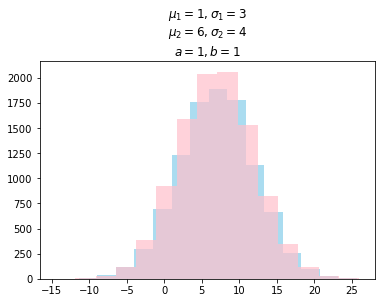

In [9]:
plot_hist(1, 3, 6, 4, 1, 1)

### 5.
Let
\begin{align}
X_{i} \sim Bernoulli(p),\ i=1,2,...,n.
\end{align}

Generate random numbers and verify central limit theorem by plotting a histogram.

In [10]:
def CLT(p, n, N):
    xbar_list = [np.mean([1 if np.random.uniform(0, 1) >= p else 0 for i in range(n)]) 
                 for j in range(N)]
    xbar_list = (np.array(xbar_list) - p) / np.sqrt(p*(1-p)/n)
    plt.hist(xbar_list, bins=15)
    plt.show()

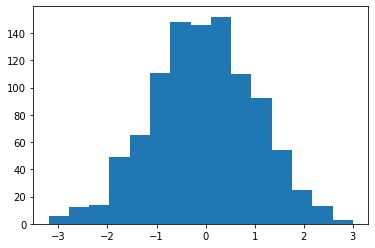

In [11]:
CLT(0.5, 100, 1000)

### 6.
Let
\begin{align}
X_{i} \sim Exp(\lambda),\ i=1,2,...,n.
\end{align}

Plot CDF and ECDF in the same figure. Verify ECDF approximately estimate CDF about very large sample size.

In [12]:
def indicator(X, x):
    if X <= x:
        return 1
    else:
        return 0

In [13]:
def ECDF(n):
    X = np.random.exponential(size=n)
    Fn_list = []
    for i in range(len(x)):
        I_list = []
        for j in range(len(X)):
            I = indicator(X[j], x[i])
            I_list.append(I)
        Fn = sum(I_list) / n
        Fn_list.append(Fn)
    return Fn_list

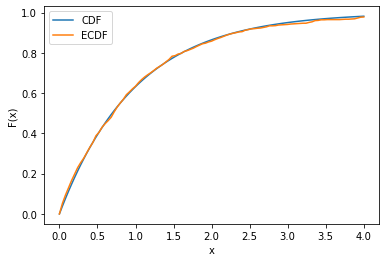

In [14]:
x = np.linspace(0, 4, 101)
plt.plot(x, scipy.stats.expon.cdf(x), label='CDF')
plt.plot(x, ECDF(1000), label='ECDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()